<a href="https://colab.research.google.com/github/RodrigoMntm/RedesNeuronales_Jueves_V1V3/blob/main/PIA_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicación de Redes Neuronales Convolucionales para Detección y Clasificación de Tumores Cerebrales.**

Josselyn Izamar García Chávez     #1963721 IB

Rodrigo Emilio Sánchez Montemayor #1965542 IB

Juan Luis García Gaspar           #1902172 IB



# **Artificial Intelligence final project.**
# **Introducción.**
Los tumores cerebrales, que van desde metástasis intracraneales hasta meningiomas y glioblastomas, plantean un desafío formidable en el diagnóstico y tratamiento médico. Como lo enfatiza J. Ricardo McFaline-Figueroa et al. (2018), una comprensión fundamental de estos tumores es crucial para los proveedores de atención médica general debido a su prevalencia. Las metástasis intracraneales, que a menudo se originan en cánceres sistémicos, junto con los meningiomas y los gliomas, en particular el glioblastoma, constituyen las formas más comunes. La naturaleza intrincada de las metástasis del sistema nervioso central exige un enfoque multidisciplinario, que incluya neurocirugía, oncología radioterápica y oncología médica para una atención integral.

Las decisiones de manejo de los tumores cerebrales están estrechamente ligadas a la información clínica y radiológica, y el grado presunto dicta el curso del tratamiento, como lo describen Andronicus A Akinyelu et al. (2022). No se puede subestimar la importancia de la evaluación no invasiva para determinar el grado del tumor, particularmente para guiar las estrategias de tratamiento. La llegada de técnicas de aprendizaje profundo (DL), como las redes neuronales convolucionales (CNN), ha sido fundamental en el ámbito del diagnóstico de tumores cerebrales. Las limitaciones de los enfoques tradicionales han estimulado el desarrollo de técnicas innovadoras, en las que las CNN desempeñan un papel central a la hora de aprovechar patrones complejos dentro de conjuntos de datos de imágenes médicas.

Con este artículo científico, nos centraremos en desentrañar las complejidades asociadas con el diagnóstico, el tratamiento oncológico y el manejo de las complicaciones médicas relacionadas con los tumores cerebrales más prevalentes. Al sintetizar conocimientos desde perspectivas clínicas y metodologías de aprendizaje profundo de vanguardia, nuestro objetivo es contribuir al panorama cambiante de la investigación de tumores cerebrales y las prácticas de atención médica.

# **Paso 1.** Bibliotecas
La primera parte consiste en importar bibliotecas.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os

# **Paso 2.** Preprocesamiento
En esta sección las imágenes se importan, se reescalan y se dividen en grupo de entrenamiento y grupo de validación. La división del conjunto de imágenes fue 70-30.


In [ ]:
!pip install kaggle
from google.colab import files

In [ ]:
files.upload()

Saving brain-tumor-mri-dataset.zip to brain-tumor-mri-dataset.zip


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/brain-tumor-mri-dataset.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [ ]:
imagenes = []
etiquetas = []

In [ ]:
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset/Training'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
class_index = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (128,128), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(class_index)
        class_index += 1

print("Longitud de imagenes:", len(imagenes))
print("Longitud de etiquetas:", len(etiquetas))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/Dataset/Training/meningioma/Tr-me_0183.jpg
/content/Dataset/Training/meningioma/Tr-me_0438.jpg
/content/Dataset/Training/meningioma/Tr-me_0272.jpg
/content/Dataset/Training/meningioma/Tr-me_0857.jpg
/content/Dataset/Training/meningioma/Tr-me_0717.jpg
/content/Dataset/Training/meningioma/Tr-me_0591.jpg
/content/Dataset/Training/meningioma/Tr-me_1051.jpg
/content/Dataset/Training/meningioma/Tr-me_0661.jpg
/content/Dataset/Training/meningioma/Tr-me_0608.jpg
/content/Dataset/Training/meningioma/Tr-me_1153.jpg
/content/Dataset/Training/meningioma/Tr-me_0157.jpg
/content/Dataset/Training/meningioma/Tr-me_0489.jpg
/content/Dataset/Training/meningioma/Tr-me_1139.jpg
/content/Dataset/Training/meningioma/Tr-me_0132.jpg
/content/Dataset/Training/meningioma/Tr-me_1244.jpg
/content/Dataset/Training/meningioma/Tr-me_0312.jpg
/content/Dataset/Training/meningioma/Tr-me_0214.jpg
/content/Dataset/Training/meningioma/Tr-me_0230.j

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(imagenes, etiquetas, test_size=0.3, random_state=42)

In [ ]:
# Normalización
train_images = [image / 255.0 for image in train_images]
test_images = [image / 255.0 for image in test_images]

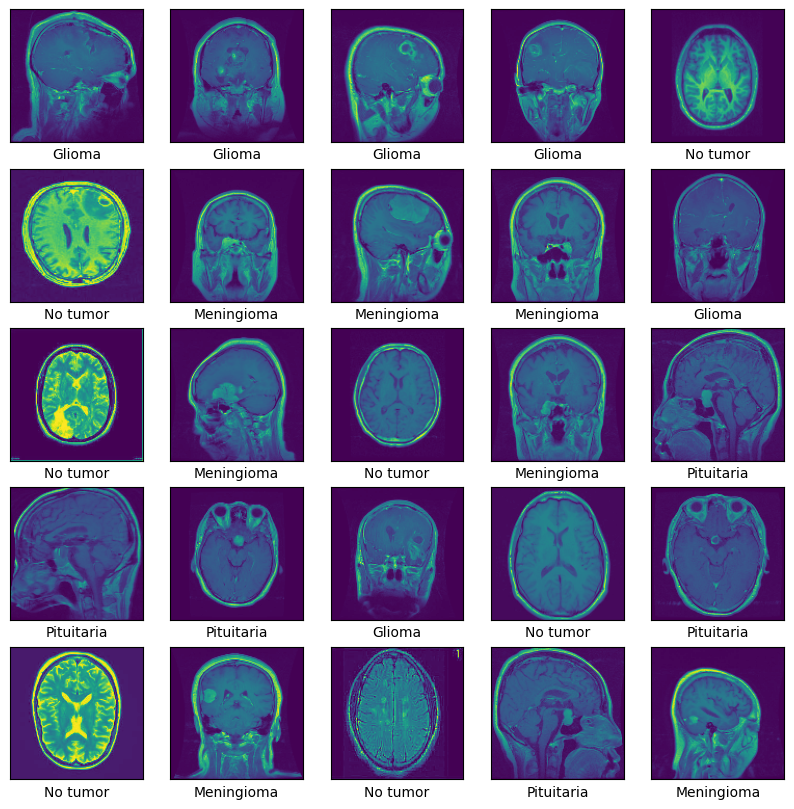

In [ ]:
class_names = ['Meningioma', 'No tumor', 'Pituitaria', 'Glioma']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray')
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Estructura y entrenamiento de la Red Neuronal Artificial Convolucional (CNN)**

Esta sección establece la cantidad de capas convolucionales y capas de aprendizaje para nuestra red neuronal artificial convolucional.



In [ ]:
# Parte Convolutional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
Total params: 92672 (362.00 KB)
Trainable params: 92672 

In [ ]:
# Parte de Aprendizaje
model.add(layers.Flatten())
model.add(layers.Dense(45, activation='relu'))
model.add(layers.Dense(4))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 100352)            0

In [ ]:
# Cumplimiento del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Entrenamiento CNN
train_images = np.array(train_images)
test_images = np.array(test_images)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
125/125 [==============================] - 140s 1s/step - loss: 0.6466 - accuracy: 0.7454 - val_loss: 0.5148 - val_accuracy: 0.7882
Epoch 2/5
125/125 [==============================] - 136s 1s/step - loss: 0.3471 - accuracy: 0.8694 - val_loss: 0.3899 - val_accuracy: 0.8471
Epoch 3/5
125/125 [==============================] - 142s 1s/step - loss: 0.2084 - accuracy: 0.9247 - val_loss: 0.4419 - val_accuracy: 0.8646
Epoch 4/5
125/125 [==============================] - 124s 996ms/step - loss: 0.1154 - accuracy: 0.9515 - val_loss: 0.3460 - val_accuracy: 0.8839
Epoch 5/5
125/125 [==============================] - 122s 978ms/step - loss: 0.0813 - accuracy: 0.9710 - val_loss: 0.3145 - val_accuracy: 0.8903


# **Resultados de desempeño de  la CNN**

54/54 - 13s - loss: 0.3145 - accuracy: 0.8903 - 13s/epoch - 233ms/step


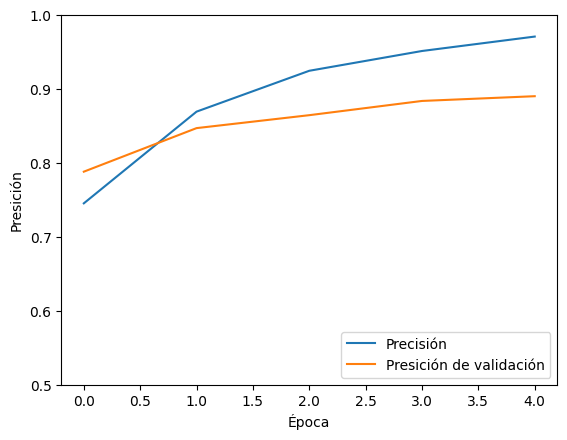

In [ ]:
plt.plot(history.history['accuracy'], label='Precisión')
plt.plot(history.history['val_accuracy'], label = 'Presición de validación')
plt.xlabel('Época')
plt.ylabel('Presición')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

54/54 [==============================] - 16s 293ms/step


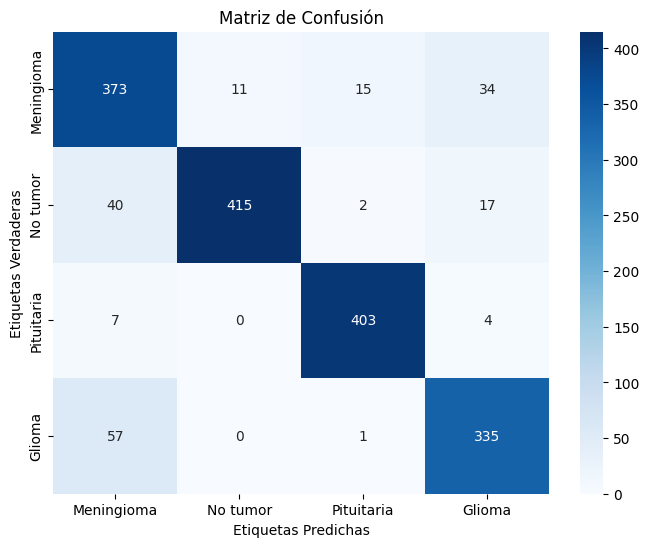

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo en el conjunto de prueba
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print("Primeras etiquetas verdaderas:", test_labels[:20])


Primeras etiquetas verdaderas: [1 2 0 3 3 2 3 2 0 0 0 2 1 2 1 2 1 1 0 3]


# **Predicciones con la CNN entrenada.**

In [ ]:
predictions = model.predict(np.array(test_images))

54/54 [==============================] - 13s 249ms/step


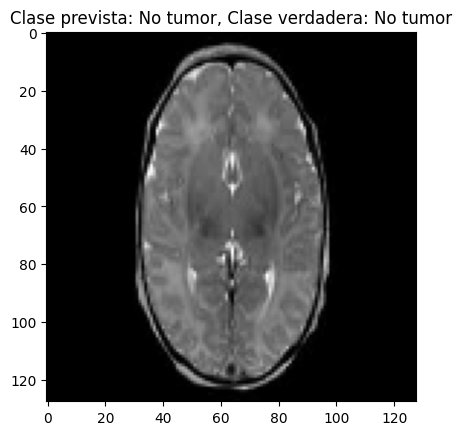

In [ ]:
image_index = 0
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Obtener la imagen correspondiente del conjunto de prueba
predicted_image = test_images[image_index]

# Mostrar la imagen predicha con nombres de clases
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

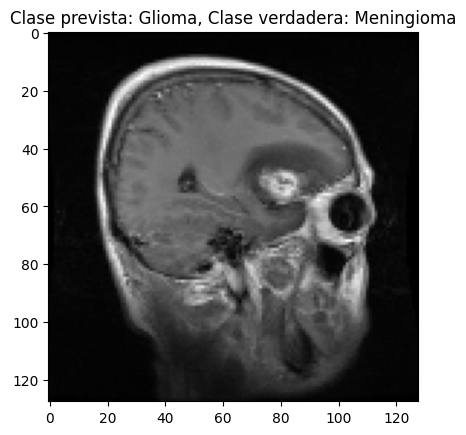

In [ ]:
image_index = 10
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

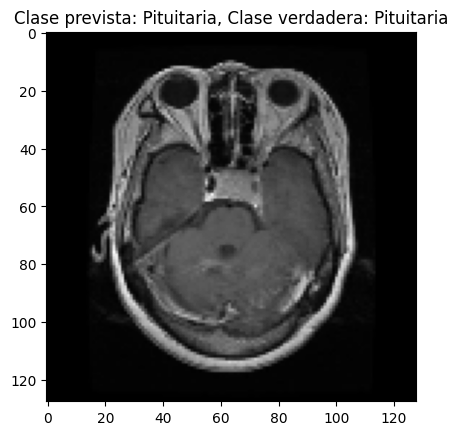

In [ ]:
# Get the index with the highest prediction for a specific image
image_index = 50
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

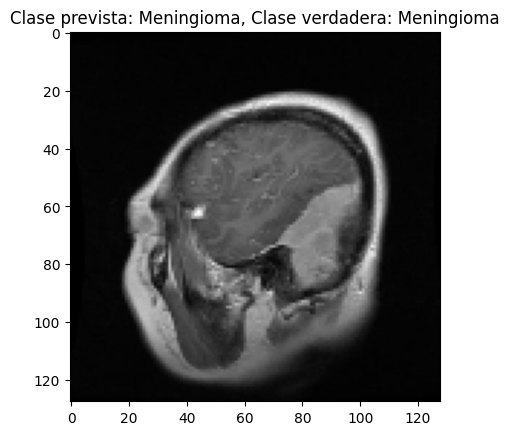

In [ ]:
# Get the index with the highest prediction for a specific image
image_index = 100
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

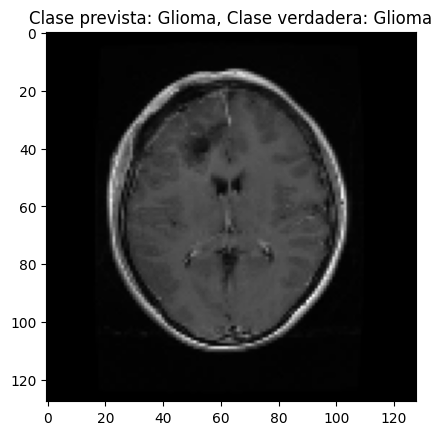

In [ ]:
# Get the index with the highest prediction for a specific image
image_index = 300
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

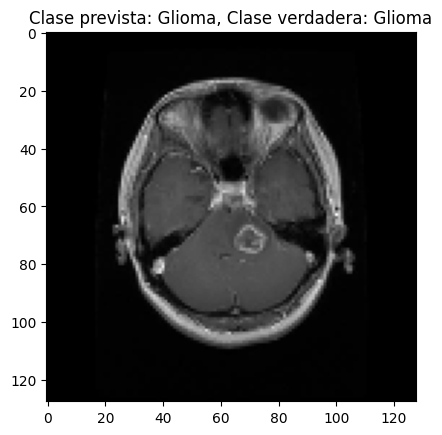

In [ ]:
image_index = 500
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

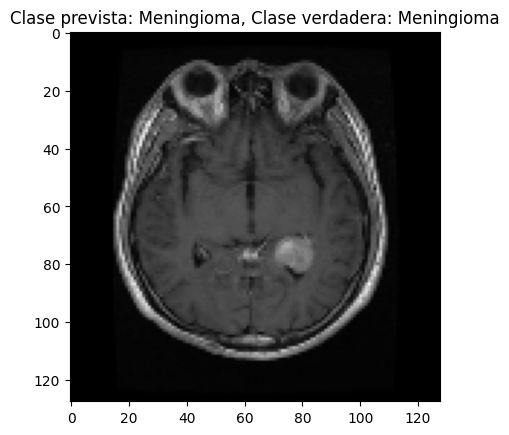

In [ ]:
# Get the index with the highest prediction for a specific image
image_index = 555
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

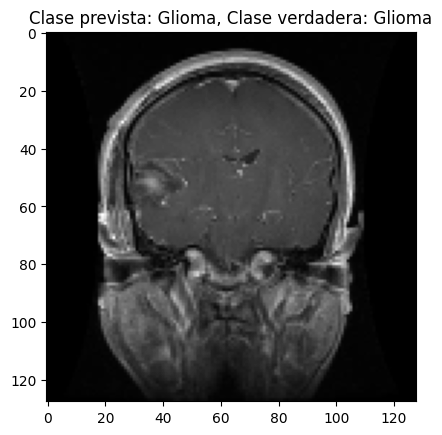

In [ ]:
image_index = 600
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

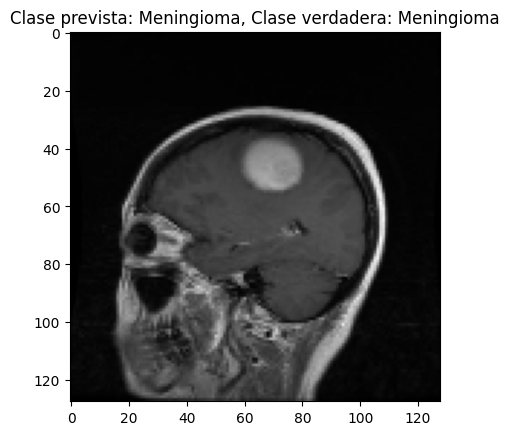

In [ ]:
image_index = 700
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

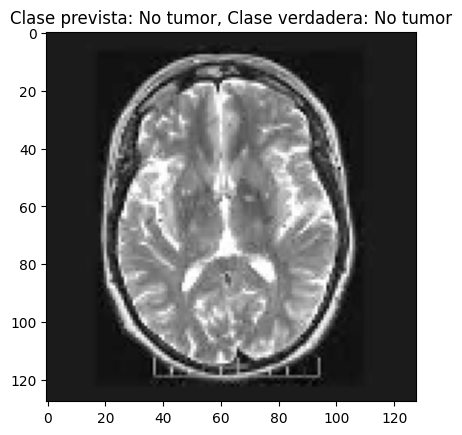

In [ ]:
image_index = 1000
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Clase prevista: {class_names[predicted_index]}, Clase verdadera: {class_names[true_label]}")
plt.show()

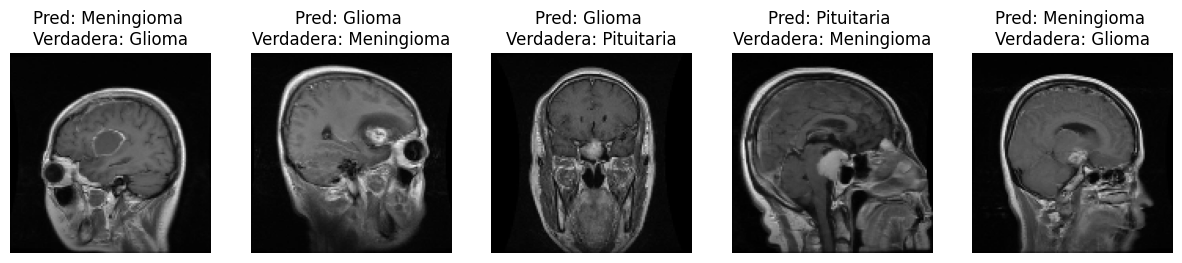

In [ ]:
incorrect_indices = []

for i in range(len(test_labels)):
    predicted_index = np.argmax(predictions[i])
    true_label = test_labels[i]

    if predicted_index != true_label:
        incorrect_indices.append(i)

# Visualize a few incorrect predictions
plt.figure(figsize=(15, 5))
for i, incorrect_index in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[incorrect_index], cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[incorrect_index])]} \nVerdadera: {class_names[test_labels[incorrect_index]]}")
    plt.axis('off')

plt.show()
